# Holiday Modeling Using Google Trends Data

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib

import cmdstanpy
cmdstanpy.install_cmdstan()
from cmdstanpy import CmdStanModel

from bayesian_holidays.src.fit_holiday_model import fit_holiday_model
from bayesian_holidays.src.plot_utils import (
    plot_posteriors,
    get_individual_holidays,
    plot_individual_holidays
)

CmdStan install directory: /Users/daniel.marthaler/.cmdstan
CmdStan version 2.36.0 already installed
Test model compilation


### Choose data and fit model

In [3]:
search_term = "ramadan"
assert search_term in ["chocolate", "ramadan"], f"Search term {search_term} not supported. Only ramadan and chocolate are supported."

In [4]:
if search_term == "ramadan":
    country='Bangladesh'
else:
    country="UnitedStates"

In [15]:
df_holiday, fit_holiday = fit_holiday_model(
    search_term,
    start_date=None,
    train_split=80,
    num_chains=4,
    max_treedepth=13,
    adapt_delta=0.95
)

11:19:21 - cmdstanpy - INFO - Chain [1] start processing
11:19:24 - cmdstanpy - INFO - Chain [1] done processing
11:19:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:01:09 - cmdstanpy - INFO - CmdStan done processing.
12:01:09 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 16 divergent transitions (1.6%)
	Chain 1 had 979 iterations at max treedepth (97.9%)
	Chain 2 had 37 divergent transitions (3.7%)
	Chain 3 had 31 divergent transitions (3.1%)
	Chain 3 had 953 iterations at max treedepth (95.3%)
	Chain 4 had 49 divergent transitions (4.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [16]:
print(fit_holiday.diagnose())

Checking sampler transitions treedepth.
1932 of 1000 (193.20%) transitions hit the maximum treedepth limit of 13, or 2^13 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
133 of 1000 (13.30%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete.



### Plot posterior in hold out set

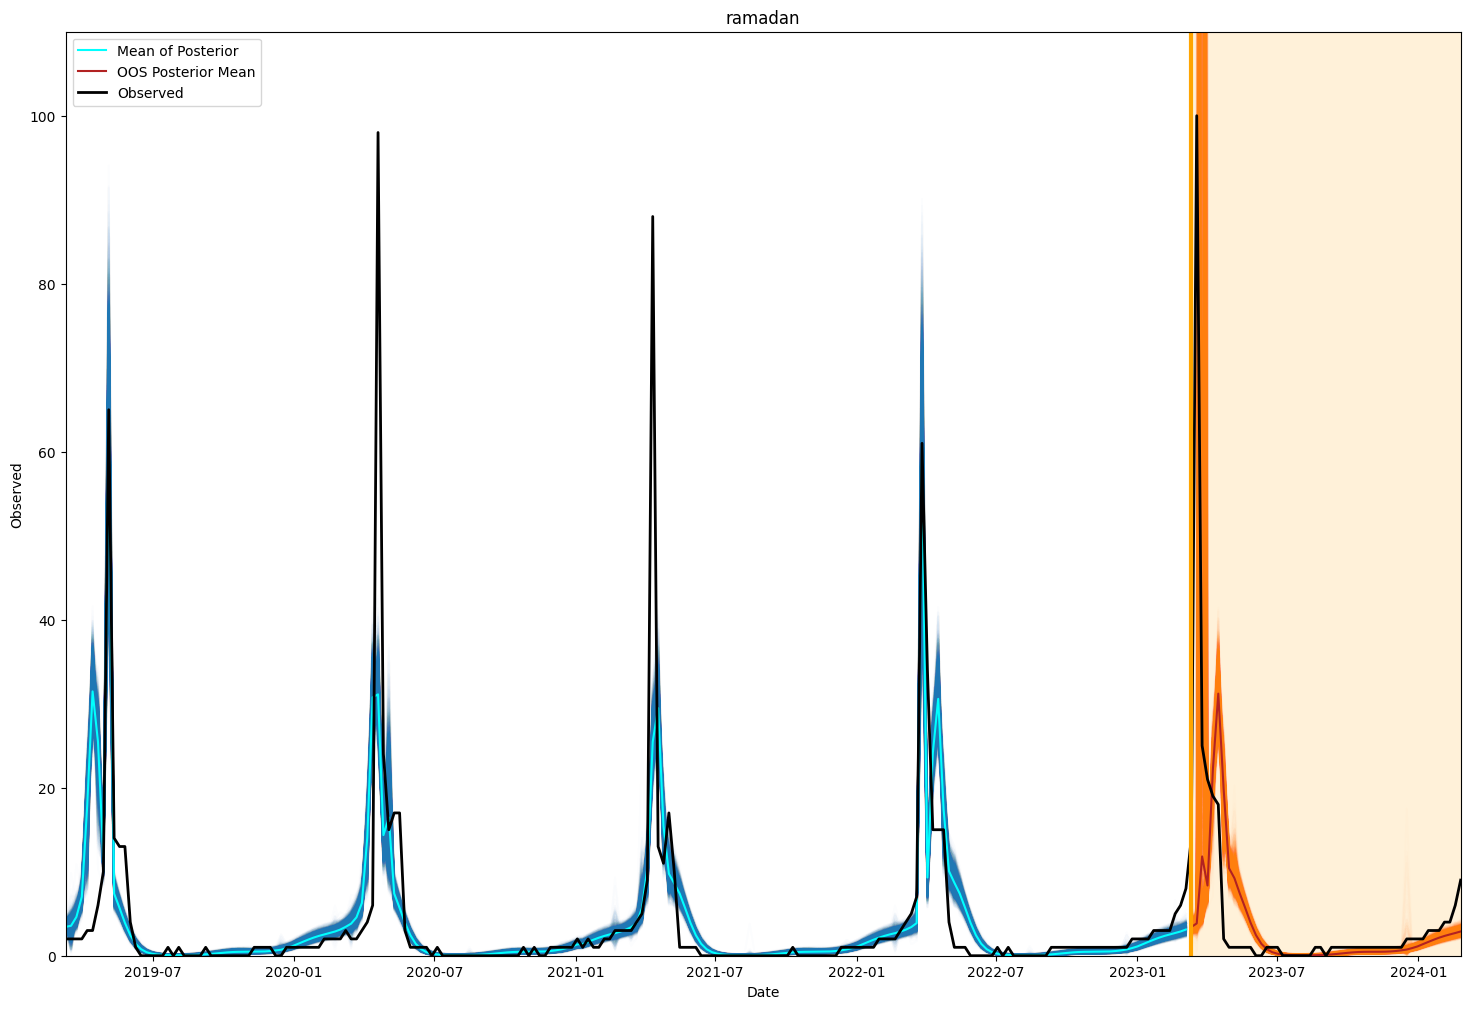

In [17]:
plot_posteriors(df_holiday, fit_holiday, search_term)

### Plot Holiday Components for this search term

In [18]:
holiday_list, hols_train, hols_test, df_train, df_test = get_individual_holidays(df_holiday, fit_holiday, country=country)

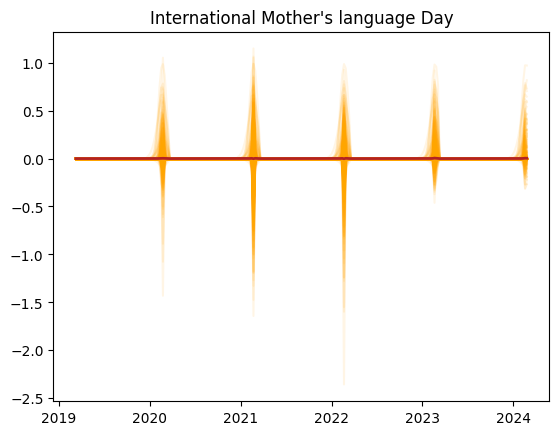

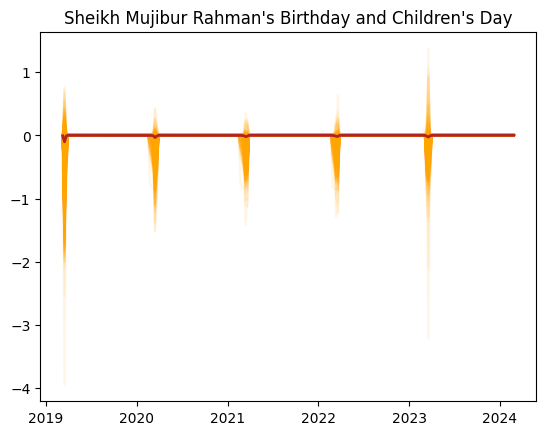

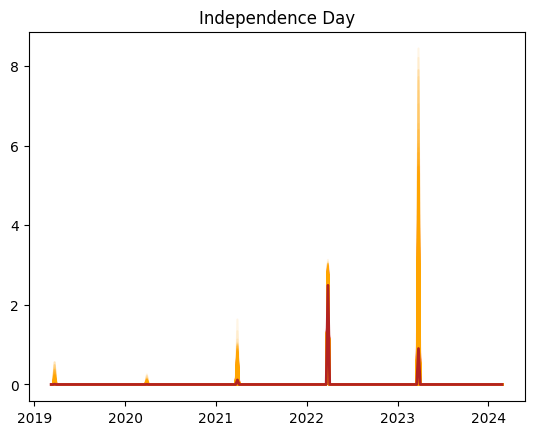

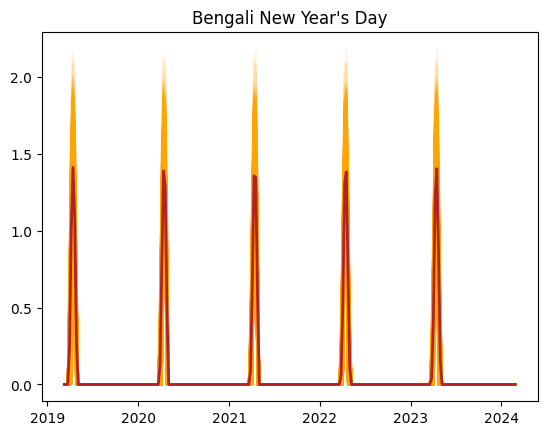

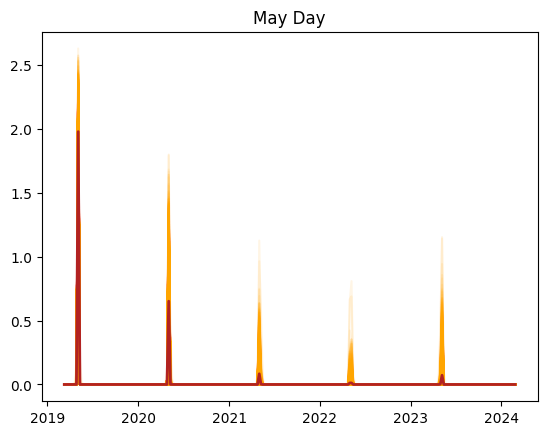

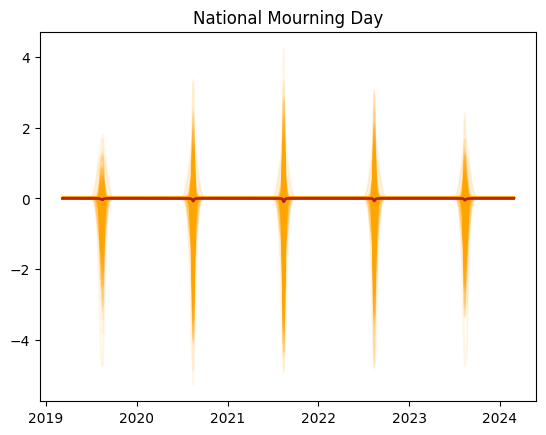

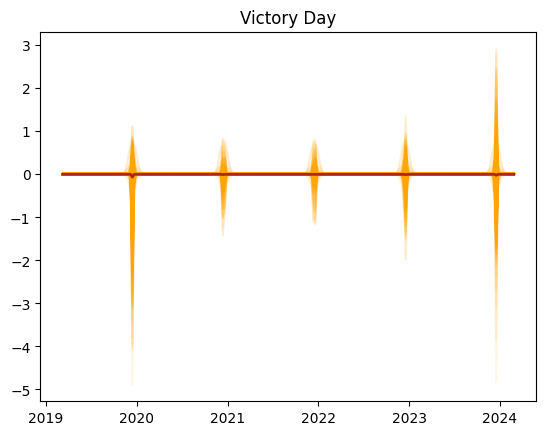

In [19]:
plot_individual_holidays(df_holiday.date,np.concatenate((hols_train, hols_test), axis=2), holiday_list.head(hols_test.shape[1]).HolidayName.values)